In [46]:
import numpy as np

import matplotlib as mp
import matplotlib.pyplot as plt
from numpy import ma
from matplotlib import ticker, cm
from munch import Munch

import matplotlib as mpl 

#Specify the plot style
mpl.rcParams.update({'font.size': 10,'font.family':'serif'})
mpl.rcParams['xtick.major.size'] = 7
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 7
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rc('text', usetex=True)

mpl.rcParams['legend.edgecolor'] = 'inherit'

from matplotlib import rc
rc("font",**{'family':'sans-serif','sans-serif':['Helvetica']})

In [47]:
#######################################################################
# Units and cosmological parameters
#######################################################################

# units and constants
physics_units = Munch(dict())
physics_units['c'] = 2.997924e8  # (*Speed of light, [m/s] *)
physics_units['mpc'] = 3.085678e22  # (* Megaparsec [m] *)
physics_units['pc'] = 3.086e16  # (*parsec [m]*)
physics_units['G'] = 6.67428e-11  # (* Gravitational constant [m^3/kg/s^2] *)
physics_units['m_sun'] = 1.989e30  # (* Sun mass [kg]*)
physics_units['year'] = 365.25 * 24 * 3600  # (* year in seconds[s] *)
physics_units['hbar'] = 6.62607e-34 / (2. * np.pi)  # (* reduced planck constant in m^2 kg /s*)
physics_units['hp'] = 6.582e-16  # (* Planck constant in eV s *)
physics_units['AU'] = 1.4960e11  # (* Astronomical unit [m]*)
physics_units['kb'] = 8.617343e-5  # (* Boltzmann constant [eV /K] *);
physics_units['eV_in_J'] = 1.60217e-19  # (*eV in Joule *)
physics_units['l_planck'] = 1.61e-35  # (*Planck length [m]*)
physics_units['rho_planck'] = 5.155e96  # (*Planck energy [kg/m^3]*)
physics_units['m_planck'] = 1.22e19  # (*Planck mass [eV]*)

# Standard cosmological parameters
cosmo_params = Munch(dict())
cosmo_params['ns'] = 0.961
cosmo_params['As'] = 2.1e-9
cosmo_params['Omb'] = 0.0456
cosmo_params['Omc'] = 0.245
cosmo_params['h'] = 0.7
cosmo_params['Nur'] = 3.046
cosmo_params['TCMB'] = 2.726
cosmo_params['kstar'] = 0.05  # TODO: check this number (is kp?)
cosmo_params['kp'] = 2.e6
# derived cosmological parameters
cosmo_params['H0'] = cosmo_params.h * 100000. / physics_units.mpc  # (* Hubble rate today, [s^-1] *)
cosmo_params['rhocr'] = 3. * cosmo_params.H0 ** 2 / (8. * np.pi * physics_units.G)  # (* Critical Density [kg/m^3] *)
cosmo_params['ar'] = 7.5657e-16  # (* Stephan's constant in J m^-3 K^-4 *);
cosmo_params['Omr'] = cosmo_params.ar * cosmo_params.TCMB ** 4 / cosmo_params.rhocr / physics_units.c ** 2  # (* Density of photons *)
cosmo_params['Omnu'] = cosmo_params.Omr * 7. / 8 * cosmo_params.Nur * (4. / 11.) ** (4. / 3.)  # (* Density of neutrinos *)
cosmo_params['OmLambda'] = 1. - (cosmo_params.Omc + cosmo_params.Omb + cosmo_params.Omr + cosmo_params.Omnu)  # (* Density of Dark Energy *)

In [48]:
#######################################################################
# Curvature power sperctrum Models:   Pk_models
#######################################################################

Pk_models = Munch(dict())
Pk_models.kp = 2.e6
Pk_models.Pk_model = 'default'
Pk_models.default = Munch(dict())
Pk_models.default.Pk_model = 'powerlaw'

#  Power law:
Pk_models.powerlaw = Munch(dict())
Pk_models.powerlaw.Pk_model = "powerlaw"
Pk_models.powerlaw.ktrans = 1.e0      # Scale of the transition between CMB amplitude and PBH amplitude
Pk_models.powerlaw.nsPBH = 0.97       # Spectral index
Pk_models.powerlaw.kp = 2.e6          # Reference scale [mpc^-1] (2.e6 corresponds to mPBH = 1 Msun)
Pk_models.powerlaw.AsPBH = 0.0205     # Power spectrum amplitude at the reference scale kp.

# "Log-normal":
Pk_models.lognormal = Munch(dict())
Pk_models.lognormal.Pk_model = "lognormal"
Pk_models.lognormal.kp = 2.e6         # Reference scale [mpc^-1] (2.e6 corresponds to mPBH = 1 Msun)
Pk_models.lognormal.AsPBH = 0.0205    # Power spectrum amplitude at the reference scale kp.
Pk_models.lognormal.sigma = 1.        # Power spectrum amplitude at the reference scale kp.

# "Gaussian":
Pk_models.gaussian = Munch(dict())
Pk_models.gaussian.Pk_model = "gaussian"
Pk_models.gaussian.kp = 2.e6           # Reference scale [mpc^-1] (2.e6 corresponds to mPBH = 1 Msun)
Pk_models.gaussian.AsPBH = 0.0205      # Power spectrum amplitude at the reference scale kp.
Pk_models.gaussian.sigma =  0.2        # Power spectrum variance.

# "Broken power-law":
Pk_models.broken_powerlaw = Munch(dict())
Pk_models.broken_powerlaw.Pk_model = "broken_powerlaw"
Pk_models.broken_powerlaw.kp = 2.e6      # Reference scale [mpc^-1] (2.e6 corresponds to mPBH = 1 Msun)
Pk_models.broken_powerlaw.AsPBH = 0.0205 # Power spectrum amplitude at the reference scale kp.
Pk_models.broken_powerlaw.kc = 2.e6      # k critical: splits btw low/high
Pk_models.broken_powerlaw.kp_low = Pk_models.broken_powerlaw.kp
Pk_models.broken_powerlaw.kp_high = Pk_models.broken_powerlaw.kp
Pk_models.broken_powerlaw.AsPBH_low = Pk_models.broken_powerlaw.AsPBH
Pk_models.broken_powerlaw.AsPBH_high = Pk_models.broken_powerlaw.AsPBH
Pk_models.broken_powerlaw.ns_low = -0.1
Pk_models.broken_powerlaw.ns_high = -0.5

# "Power spectrum from multifield"
Pk_models.multifield = Munch(dict())
Pk_models.multifield.Pk_model = "multifield"
Pk_models.multifield.kf = 2e6          # scale H-crossing at sharp turn  [mpc^-1]
Pk_models.multifield.P0 = 2e-9        # Amplitude Pk in absence of transient instability
Pk_models.multifield.eta = 4.           # TODO: check value
Pk_models.multifield.delta = 2.2          # TODO: check value
Pk_models.multifield.kp = Pk_models.multifield.kf


# "Power spectrum from axion-gauge"
Pk_models.axion_gauge = Munch(dict())
Pk_models.axion_gauge.Pk_model = "axion_gauge"
Pk_models.axion_gauge.kp = 2.1e6           # Reference scale [mpc^-1] (2.e6 corresponds to mPBH = 1 Msun)
Pk_models.axion_gauge.As_vac = 0.0205      # TODO: k-dependent
Pk_models.axion_gauge.AsPBH = 0.0205      # TODO: k-dependent
Pk_models.axion_gauge.sigma = 1.          # TODO: k-dependent

# "Power spectrum from preheating"
Pk_models.preheating = Munch(dict())
Pk_models.preheating.Pk_model = "preheating"
Pk_models.preheating.kend = 2.e6     #
Pk_models.preheating.Hstar = 1.0e14      # TODO: k-dependent
Pk_models.preheating.e1 = 0.01           # TODO: k-dependent
Pk_models.preheating.e2 = 0.0001            # TODO: k-dependent
Pk_models.preheating.C = -0.7296          
Pk_models.preheating.kp = Pk_models.preheating.kend


In [49]:
PS_models = Pk_models

# Base Class model 

class PS_Base:
    def __init__(self, As_cosmo=None, ns_cosmo=None, kstar_cosmo=None, cm=None): 

        cm = cm if cm else cosmo_params
        self.cm = cm
        self.As_cosmo = As_cosmo if As_cosmo else cm.As
        self.ns_cosmo = ns_cosmo if ns_cosmo else cm.ns
        self.kstar_cosmo = kstar_cosmo if kstar_cosmo else cm.kp
        # self.is_kp_cnst = True


    def PS_vac(self, kk):
        PS = self.As_cosmo * (kk / self.kstar_cosmo) ** (self.ns_cosmo - 1.) 
        return PS

    def PS(self, kk):
        # PS =  PS_vac(self, kk)
        print(">> Powerspectrum (PS) not specified, assuming PS vacuum.")
        return  self.PS_vac(kk)

    def PS_plus_vaccumm(self, kk):
        return self.PS_vac(kk) + self.PS(kk)



    
    def get_children_strings(self):
        list_of_strings = []
        out = dict()
        for attr_name in dir(self):
            if attr_name not in dir(PS_Base):
                attr = getattr(self, attr_name)
                if hasattr(attr, 'get_children_strings'):
                    list_of_strings.extend(["." + attr_name + child_string for child_string in attr.get_children_strings()])
                else:
                    list_of_strings.append("" + attr_name + " = " + str(attr))
                    out["./" + attr_name] = attr
        return  list_of_strings 

    def get_attr(self):
        out = dict()
        for attr_name in dir(self):
            if attr_name not in dir(PS_Base()):
                attr = getattr(self, attr_name)
                out[attr_name] = attr
        return  out 

    def print_att(self):
        out = self.get_attr()
        print("Attributes of ", self.__class__.__name__ , "\n   >>   ", out)



#  Coded models:  

class PS_Vacuum(PS_Base):
    def __init__(self, As_cosmo=None, ns_cosmo=None, kstar_cosmo=None, cm=None): 
        super().__init__()
        cm = cm if cm else cosmo_params
        self.As = As_cosmo if As_cosmo else cm.As
        self.ns = ns_cosmo if ns_cosmo else cm.ns
        self.kstar = kstar_cosmo if kstar_cosmo else cm.kp

    def PS(self, kk):
        PS = self.As * (kk / self.kstar) ** (self.ns - 1.) 
        return PS


class PS_Powerlaw(PS_Base):
    
    def __init__(self, As=None, ns=None, kp=None,  ktrans=None, cm=None): 
        super().__init__()
        cm = cm if cm else cosmo_params
        self.As = As if As else PS_models.powerlaw.AsPBH
        self.ns = ns if ns else PS_models.powerlaw.nsPBH
        self.kp = kp if kp else PS_models.powerlaw.kp
        self.ktrans = ktrans if ktrans else PS_models.powerlaw.ktrans


    def PS(self, kk):
        PS =self.As * (kk / self.kp) ** (self.ns - 1) * np.heaviside(kk - self.ktrans, 0.5)
        return PS


class PS_LogNormal(PS_Base): 
    def __init__(self, As=None, sigma=None, kp=None, cm=None): 
        
        super().__init__()
        cm = cm if cm else cosmo_params
        self.As = As if As else PS_models.lognormal.AsPBH
        self.sigma = sigma if sigma else PS_models.lognormal.sigma
        self.kp = kp if kp else PS_models.lognormal.kp
    
    def PS(self, kk):
        
        PS = self.As * np.exp(- np.log(kk / self.kp) ** 2 / (2 * self.sigma ** 2))
        return PS


class PS_Gaussian(PS_Base):
    
    def __init__(self, As=None, sigma=None, kp=None, cm=None, verbose=False): 
        
        super().__init__()
        cm = cm if cm else cosmo_params
        self.As = As if As else PS_models.gaussian.AsPBH
        self.sigma = sigma if sigma else PS_models.gaussian.sigma
        self.kp = kp if kp else PS_models.gaussian.kp

        if verbose: print(f"Guassian PS loaded with {self.As}, {self.sigma}, {self.kp} ")
    
    
    def PS(self, kk):
        Pk = self.As * np.exp(- (kk - self.kp)** 2 / (2 * (self.sigma * self.kp) ** 2))
        # PS = self.AsPBH * np.exp(-(kk - self.kp)** 2 / (2 * (self.sigma) ** 2))
        return Pk


class PS_BrokenPowerlaw(PS_Base):

    def __init__(self, As_low=None, As_high=None, kp_low=None, kp_high=None, ns_low=None, ns_high=None, kc=None,cm=None): 
        
        super().__init__()
        cm = cm if cm else cosmo_params
        self.As_low = As_low if As_low else PS_models.broken_powerlaw.AsPBH_low
        self.As_high = As_high if As_high else PS_models.broken_powerlaw.AsPBH_high
        self.kp_low = kp_low if kp_low else PS_models.broken_powerlaw.kp_low
        self.kp_high = kp_high if kp_high else PS_models.broken_powerlaw.kp_high
        self.kc = kc if kc else PS_models.broken_powerlaw.kc
        self.ns_high = ns_high if ns_high else PS_models.broken_powerlaw.ns_high
        self.ns_low = ns_low if ns_low else PS_models.broken_powerlaw.ns_low


    def PS(self, kk):
        if isinstance(kk, float):
            kk = np.array([kk])

        PS = np.zeros_like(kk)
        mask = (kk < self.kc)
        PS[mask] = self.As_low * (kk[mask] / self.kp_low) ** self.ns_low
        PS[~mask] = self.As_high * (kk[~mask] / self.kp_high) ** self.ns_high
        return PS


class PS_AxionGauge(PS_Base):
    
    def __init__(self, As=None, sigma=None, kp=None, cm=None, with_vacuum=True): 
        
        super().__init__()
        cm = cm if cm else cosmo_params
        self.As = As if As else PS_models.axion_gauge.AsPBH
        self.sigma = sigma if sigma else PS_models.axion_gauge.sigma
        self.kp = kp if kp else PS_models.axion_gauge.kp
        self.with_vacuum = with_vacuum
    
    
    def PS_without_vacuum(self, kk):
        PS = self.As * np.exp(- np.log(kk / self.kp) ** 2 / (2 * self.sigma ** 2))
        return PS

    def PS(self, kk):
        if self.with_vacuum:
            return self.PS_vac(kk) + self.PS_without_vacuum(kk) 
        else:
            return self.PS_without_vacuum(kk) 
            # PS = self.As * np.exp(- np.log(kk / self.kp) ** 2 / (2 * self.sigma ** 2))
            # return PS


class PS_Preheating(PS_Base):

    
    def __init__(self, Hstar=None, e1=None, e2=None, C=None, kend=None, cm=None): 
        
        super().__init__()
        self.cm = cm if cm else cosmo_params
        self.Hstar = Hstar if Hstar else PS_models.preheating.Hstar
        self.e1 = e1 if e1 else PS_models.preheating.e1
        self.e2 = e2 if e2 else PS_models.preheating.e2
        self.C = C if C else PS_models.preheating.C
        self.kend = kend if kend else PS_models.preheating.kend
    
    
    def PS(self, kk):

        if isinstance(kk, float):  # necessary when using mask
            kk = np.array([kk])

        cm = self.cm
        pu = physics_units

        PS = np.zeros_like(kk)
        mask = (kk < self.kend)
        P0 = self.Hstar**2 / ( self.e1 *8 * np.pi**2 * pu.m_planck**2 )               #TODO : define Hstar as function of As??
        PS[~mask] = P0 
        PS[mask] = self.Hstar**2 / (8 * np.pi**2 * pu.m_planck**2  * self.e1) * \
                (1 + (kk[mask]/self.kend)**2) * (1 - 2*(self.C+1)*self.e1 - self.C * self.e2)
        
            # TODO: Hstar, e1 and e2  should be k-dependent ??.

        return PS


class PS_Multifield(PS_Base):
    
    def __init__(self, P0=None, eta=None, delta=None, kf=None): 
        
        super().__init__()
        self.P0 = P0 if P0 else PS_models.multifield.P0
        self.eta = eta if eta else PS_models.multifield.eta
        self.delta = delta if delta else PS_models.multifield.delta
        self.kf = kf if kf else PS_models.multifield.kf


    def PS(self, kk):

        if isinstance(kk, float):  # necessary when using mask
            kk = np.array([kk])

        PS = np.zeros_like(kk)
        kappa = kk/self.kf
        arg = (2-kappa)*kappa
        mask = (kappa < 1.7)

        PS[~mask] = self.P0
        PS[mask] = self.P0 * np.exp(2*np.sqrt(arg[mask])*self.eta*self.delta) / (2*arg[mask]) * \
            np.sin(np.exp(-self.delta/2)*kappa[mask]*self.eta + np.arctan(kappa[mask]/np.sqrt(arg[mask])))
        return PS 


class PS_UserImport(PS_Base):

    def __init__(self, user_k, user_PS): 
        self._user_k = user_k 
        self._user_PS = user_PS

        self.interp_func = interp1d(user_k, user_PS) 
            
    def PS(self, kk):
        PS = self.interp_func(kk)
        return PS


class PS_UserFunction(PS_Base):

    def __init__(self, func):
        self.myPSfunction = func
    

    def PS(self, kk):
        # returns the primordial power spectrum of curvature fluctuations at scale kk
        return self.myPSfunction(kk)


# Ensamble of models: 

class PowerSpectrum:

    gaussian = PS_Gaussian
    powerlaw = PS_Powerlaw
    lognormal = PS_LogNormal
    broken_powerlaw = PS_BrokenPowerlaw
    axion_gauge = PS_AxionGauge
    preheating = PS_Preheating
    multifield = PS_Multifield
    user_import = PS_UserImport
    user_function = PS_UserFunction
    vacuum = PS_Vacuum

    def get_defaultPS():
        
        if PS_models.default.Pk_model== "powerlaw":
            return PS_Powerlaw
        else: 
            raise("Default powerspectrum not set up. ")

    default = get_defaultPS()

    def get_model(model, **kargs):

        if model=="gaussian": return PowerSpectrum.gaussian(kargs)
        if model=="powerlaw": return PowerSpectrum.powerlaw(kargs)
        if model=="lognormal": return PowerSpectrum.lognormal(kargs)
        if model=="broken_powerlaw": return PowerSpectrum.broken_powerlaw(kargs)
        if model=="axion_gauge": return PowerSpectrum.axion_gauge(kargs)
        if model=="preheating": return PowerSpectrum.preheating(kargs)
        if model=="multifield": return PowerSpectrum.multifield(kargs)
        if model=="vacuum": return PowerSpectrum.vacuum(kargs)

    


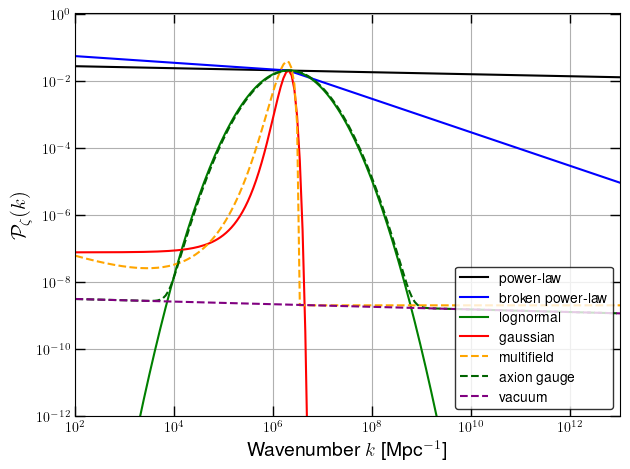

In [50]:
models = [ 
    'powerlaw',
    'broken_powerlaw',
    'lognormal',
    'gaussian',
    'multifield',
    'axion_gauge',
    # 'preheating',
    'vacuum'
]

model_name = [
    'power-law',
    'broken power-law',
    'lognormal',
    'gaussian',
    'multifield',
    'axion gauge',
    # 'preheating',   #   (2.20)
    'vacuum'
]

color_pal = ['k', 'b', 'g', 'r',  'orange', 'darkgreen', 'purple', 'k']
lstyle = ['-', '-', '-', '-',      '--', '--', '--', '--']

xmin = 10**2
xmax = 10**13
ymin = 1e-12
ymax = 1.05
k_values = 10**np.linspace(np.log10(xmin), np.log10(xmax), 200)
   

    
def plot_SingleFigure():
    
    figPk = plt.figure()
    figPk.patch.set_facecolor('white')
    ax = figPk.add_subplot(111)
    
    for i, model in enumerate(models):

        PM = PowerSpectrum.get_model(model)
        xs = k_values
        ys = PM.PS(kk=k_values)     
        lbl = "{}".format(model_name[i])
        ax.plot(xs, ys, label=lbl, color=color_pal[i], ls=lstyle[i])
        
#     plt.title("Primoridal power sepctrum")
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.ylim(ymin,ymax)
    plt.xlim(xmin,xmax)
    plt.xlabel('Wavenumber $k$  [Mpc$^{-1}$]', fontsize=14)
    plt.ylabel(r'$\mathcal{P}_{\zeta} (k)$', fontsize=15)
    
    plt.legend(loc=4)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("powerspectrum_models.png")
    plt.show()
    
    return plt, ax

p, a = plot_SingleFigure()